<ipython-input-30-7596562d649b>:16: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
<ipython-input-30-7596562d649b>:21: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)


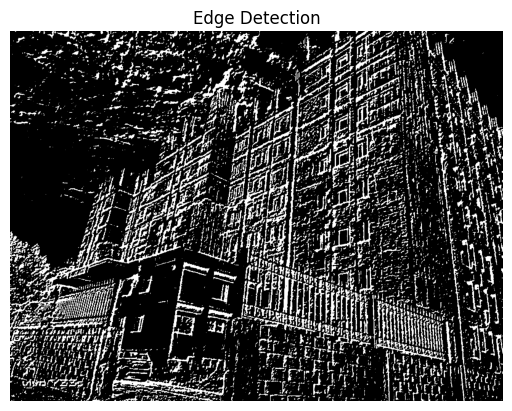

Alternative result saved as 'edges_alternative.jpg'


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/hostel.jpg', cv2.IMREAD_GRAYSCALE)

# Approach 1: Noise Reduction (Median Blur)
smoothed_image = cv2.medianBlur(image, 5)

# Approach 2: Gradient Calculation (Scharr)
gradient_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
gradient_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

# Approach 3: Gradient Magnitude Calculation (L2-Norm)
gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / gradient_magnitude.max())

# Approach 4: Non-Maximum Suppression (OpenCV Function)
def non_maximum_suppression_opencv(gradient_x, gradient_y):
    gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    gradient_direction = np.degrees(gradient_direction)
    gradient_direction = (gradient_direction + 180) % 180

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(gradient_magnitude, cv2.MORPH_CLOSE, kernel)

# Create a kernel for morphological operations
suppressed_image = non_maximum_suppression_opencv(gradient_x, gradient_y)

# Convert the suppressed image to 8-bit
suppressed_image = np.uint8(suppressed_image)

# Approach 5: Double Thresholding (Otsu's Thresholding)
_, thresholded_image = cv2.threshold(suppressed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Approach 6: Edge Tracking by Hysteresis (Custom Function)
def custom_hysteresis(thresholded_image, low_threshold, high_threshold):
    rows, cols = thresholded_image.shape
    result = np.zeros((rows, cols), dtype=np.uint8)
    strong_edge_pixels = (thresholded_image >= high_threshold)

    result[strong_edge_pixels] = 255  # Mark strong edges

    # Define 8-connected neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for i in range(rows):
        for j in range(cols):
            if thresholded_image[i, j] >= low_threshold and result[i, j] != 255:
                for dx, dy in neighbors:
                    x, y = i + dx, j + dy
                    if 0 <= x < rows and 0 <= y < cols and result[x, y] == 255:
                        result[i, j] = 255
                        break

    return result

low_threshold = 40
high_threshold = 100
edges = custom_hysteresis(thresholded_image, low_threshold, high_threshold)

# Display the final result using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

# Save the result and print a message
cv2.imwrite('edges_alternative.jpg', edges)
print("Alternative result saved as 'edges_alternative.jpg'")

<ipython-input-32-8226ca5330c5>:16: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
<ipython-input-32-8226ca5330c5>:21: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)


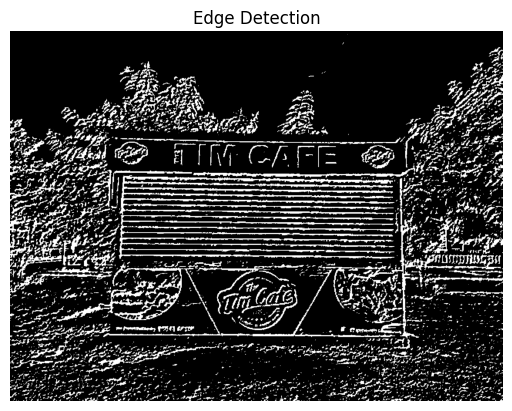

Alternative result saved as 'edges_alternative.jpg'


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/tim.jpg', cv2.IMREAD_GRAYSCALE)

# Approach 1: Noise Reduction (Median Blur)
smoothed_image = cv2.medianBlur(image, 5)

# Approach 2: Gradient Calculation (Scharr)
gradient_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
gradient_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

# Approach 3: Gradient Magnitude Calculation (L2-Norm)
gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / gradient_magnitude.max())

# Approach 4: Non-Maximum Suppression (OpenCV Function)
def non_maximum_suppression_opencv(gradient_x, gradient_y):
    gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    gradient_direction = np.degrees(gradient_direction)
    gradient_direction = (gradient_direction + 180) % 180

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(gradient_magnitude, cv2.MORPH_CLOSE, kernel)

# Create a kernel for morphological operations
suppressed_image = non_maximum_suppression_opencv(gradient_x, gradient_y)

# Convert the suppressed image to 8-bit
suppressed_image = np.uint8(suppressed_image)

# Approach 5: Double Thresholding (Otsu's Thresholding)
_, thresholded_image = cv2.threshold(suppressed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Approach 6: Edge Tracking by Hysteresis (Custom Function)
def custom_hysteresis(thresholded_image, low_threshold, high_threshold):
    rows, cols = thresholded_image.shape
    result = np.zeros((rows, cols), dtype=np.uint8)
    strong_edge_pixels = (thresholded_image >= high_threshold)

    result[strong_edge_pixels] = 255  # Mark strong edges

    # Define 8-connected neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for i in range(rows):
        for j in range(cols):
            if thresholded_image[i, j] >= low_threshold and result[i, j] != 255:
                for dx, dy in neighbors:
                    x, y = i + dx, j + dy
                    if 0 <= x < rows and 0 <= y < cols and result[x, y] == 255:
                        result[i, j] = 255
                        break

    return result

low_threshold = 40
high_threshold = 100
edges = custom_hysteresis(thresholded_image, low_threshold, high_threshold)

# Display the final result using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

# Save the result and print a message
cv2.imwrite('edges_alternative.jpg', edges)
print("Alternative result saved as 'edges_alternative.jpg'")

<ipython-input-35-3442c02246a3>:16: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
<ipython-input-35-3442c02246a3>:21: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)


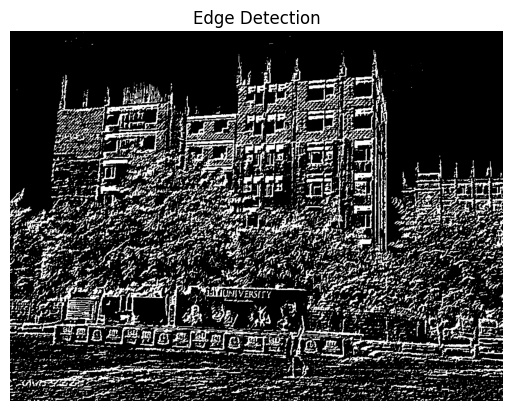

Alternative result saved as 'edges_alternative.jpg'


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/hostel 2.jpg', cv2.IMREAD_GRAYSCALE)

# Approach 1: Noise Reduction (Median Blur)
smoothed_image = cv2.medianBlur(image, 5)

# Approach 2: Gradient Calculation (Scharr)
gradient_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
gradient_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

# Approach 3: Gradient Magnitude Calculation (L2-Norm)
gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / gradient_magnitude.max())

# Approach 4: Non-Maximum Suppression (OpenCV Function)
def non_maximum_suppression_opencv(gradient_x, gradient_y):
    gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    gradient_direction = np.degrees(gradient_direction)
    gradient_direction = (gradient_direction + 180) % 180

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(gradient_magnitude, cv2.MORPH_CLOSE, kernel)

# Create a kernel for morphological operations
suppressed_image = non_maximum_suppression_opencv(gradient_x, gradient_y)

# Convert the suppressed image to 8-bit
suppressed_image = np.uint8(suppressed_image)

# Approach 5: Double Thresholding (Otsu's Thresholding)
_, thresholded_image = cv2.threshold(suppressed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Approach 6: Edge Tracking by Hysteresis (Custom Function)
def custom_hysteresis(thresholded_image, low_threshold, high_threshold):
    rows, cols = thresholded_image.shape
    result = np.zeros((rows, cols), dtype=np.uint8)
    strong_edge_pixels = (thresholded_image >= high_threshold)

    result[strong_edge_pixels] = 255  # Mark strong edges

    # Define 8-connected neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for i in range(rows):
        for j in range(cols):
            if thresholded_image[i, j] >= low_threshold and result[i, j] != 255:
                for dx, dy in neighbors:
                    x, y = i + dx, j + dy
                    if 0 <= x < rows and 0 <= y < cols and result[x, y] == 255:
                        result[i, j] = 255
                        break

    return result

low_threshold = 50
high_threshold = 100
edges = custom_hysteresis(thresholded_image, low_threshold, high_threshold)

# Display the final result using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

# Save the result and print a message
cv2.imwrite('edges_alternative.jpg', edges)
print("Alternative result saved as 'edges_alternative.jpg'")

<ipython-input-33-a7129db0044f>:16: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
<ipython-input-33-a7129db0044f>:21: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)


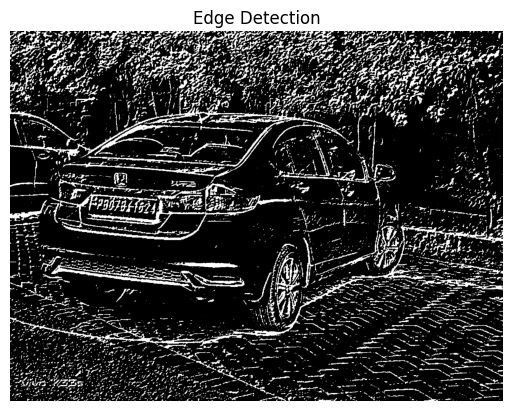

Alternative result saved as 'edges_alternative.jpg'


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

# Approach 1: Noise Reduction (Median Blur)
smoothed_image = cv2.medianBlur(image, 5)

# Approach 2: Gradient Calculation (Scharr)
gradient_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
gradient_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

# Approach 3: Gradient Magnitude Calculation (L2-Norm)
gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / gradient_magnitude.max())

# Approach 4: Non-Maximum Suppression (OpenCV Function)
def non_maximum_suppression_opencv(gradient_x, gradient_y):
    gradient_magnitude = np.sqrt(gradient_x*2 + gradient_y*2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    gradient_direction = np.degrees(gradient_direction)
    gradient_direction = (gradient_direction + 180) % 180

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.morphologyEx(gradient_magnitude, cv2.MORPH_CLOSE, kernel)

# Create a kernel for morphological operations
suppressed_image = non_maximum_suppression_opencv(gradient_x, gradient_y)

# Convert the suppressed image to 8-bit
suppressed_image = np.uint8(suppressed_image)

# Approach 5: Double Thresholding (Otsu's Thresholding)
_, thresholded_image = cv2.threshold(suppressed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Approach 6: Edge Tracking by Hysteresis (Custom Function)
def custom_hysteresis(thresholded_image, low_threshold, high_threshold):
    rows, cols = thresholded_image.shape
    result = np.zeros((rows, cols), dtype=np.uint8)
    strong_edge_pixels = (thresholded_image >= high_threshold)

    result[strong_edge_pixels] = 255  # Mark strong edges

    # Define 8-connected neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for i in range(rows):
        for j in range(cols):
            if thresholded_image[i, j] >= low_threshold and result[i, j] != 255:
                for dx, dy in neighbors:
                    x, y = i + dx, j + dy
                    if 0 <= x < rows and 0 <= y < cols and result[x, y] == 255:
                        result[i, j] = 255
                        break

    return result

low_threshold = 50
high_threshold = 150
edges = custom_hysteresis(thresholded_image, low_threshold, high_threshold)

# Display the final result using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

# Save the result and print a message
cv2.imwrite('edges_alternative.jpg', edges)
print("Alternative result saved as 'edges_alternative.jpg'")